<a href="https://colab.research.google.com/github/DavidS324/Sexton_David_Math24/blob/main/Sexton_David_Math_24_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo

In [ ]:
# The name monte_carlo_integrate was used for three seperate functions throughout the code causing multiple lines of code to break if run after the later definitions of the function.
# Easily replicated by pressing run all and then attempting to use the first lines testing the function.
# The various functions have been renamed monte_carlo_integrate1, monte_carlo_integrate2, and monte_carlo_integrate3 to prevent the later definitions from breaking the code dependant on the earlier definitions

In [207]:
import numpy as np
import matplotlib.pyplot as plt
# Imports Python functions

In [208]:
x = np.linspace(-3,3,100) # Creates an array of 100 values from -3 to 3

In [209]:
y = x**2 + 2 # Creates an array for y where each value is equal to (x^2)+2 in the same array position

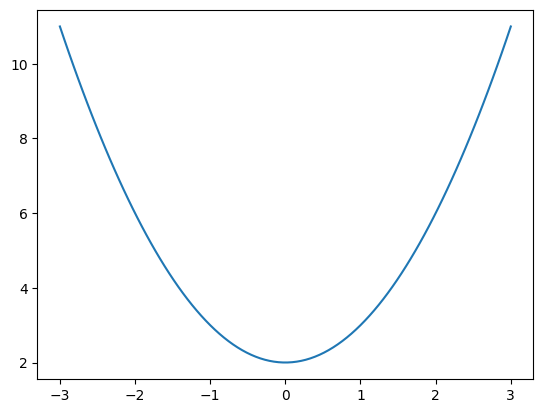

In [210]:
plt.plot(x,y) # Plots the x array vs the y array

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [211]:
13/3 # Result of integrating the y equation to find the area of a specific range of values

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [212]:
def f(x):
    y = x**2 + 2
    return y
    # defines the f(x) function to create a y array where each value is equivalent to the value in the same position in x is squared and adds 2 to it

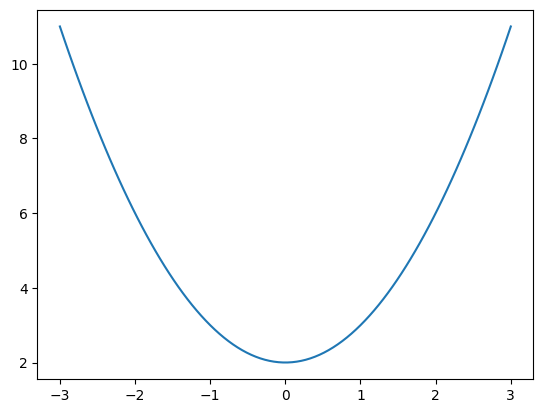

In [213]:
plt.plot(x,f(x)) # Plots the original x array vs the f(x) function to ensure it works as expected

In [214]:
M = 10 # Value for the M variable for later use

In [215]:
a = 1
b = 2
# Values for a and b to use later

In [216]:
x = a + (b-a)*np.random.random() # Uses the a and b values to define x

In [217]:
x #Prints x  to confirm the value

1.8956710438075421

In [218]:
y = M*np.random.random() # Generates a random number and multiplies it by M to define the y variable

In [219]:
x,y,f(x) # Prints the x, y, and f(x) variables to confirm the values

(1.8956710438075421, 3.783623386836429, 5.593568706330377)

In [220]:
y < f(x) # Tests whether the y variable is less than the f(x) variable

True

In [221]:
N = 100_000
S = 0
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

M*(b-a)*(S/N)
# Generates a value for x and y 100,000 times adding the value of y to S every time the generated value is less than f(x)
# Also prints the result of the M variable times the difference between b and a and the value of the sum divided by the number of iterations

4.34

In [222]:
def f(x):
    y = x**2 + 2
    return y
    # Repeats the definition of the f(x) function from earlier

In [223]:
def monte_carlo_integrate1(f,a,b,N):

    N = 100000
    S = 0
    for i in range(N):

        x = a + (b-a)*np.random.random()
        y = M*np.random.random()

        S += (y < f(x))

    return M*(b-a)*(S/N)
    # Uses the earlier equation to define the first monte_carlo_integrate function

In [242]:
monte_carlo_integrate1(f,1,2,1000) # Tests the monte_carlo_integrate function

4.3532

In [225]:
from sympy import * # Imports the * symbol and allows for symbolic math

In [226]:
x = Symbol('x') #Defines x as the symbol x for use as an unknown

In [227]:
x # Tests that it returns the symbol

x

In [228]:
integrate(x**2 + 2, (x,1,2)) # Uses the integrate function allowed by the earlier import to integrate the earlier equation

13/3

In [229]:
13/3 # Shows the value of the result of the integration

4.333333333333333

In [230]:
integrate(x**3 + 3, (x,1,2)) # Shows another integration, this time of (x^3)+3

27/4

In [231]:
27/4 # The value of the second integration

6.75

In [232]:
x = 0 # Sets the x variable to 0

In [233]:
def f(x):
    y = x**3 + 3
    return y

    # Defines the f(x) function to use the 2nd equation for y

In [234]:
monte_carlo_integrate1(f,1,2,1000000) # Uses the first monte_carlo_integrate function with the new f(x)

6.691700000000001

In [244]:
N = 2000
S = 0
Z = np.zeros(N,)
for i in range(1,N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

    Z[i] = M*(b-a)*(S/i)
    # Creates an array for the Z variable, this time i is used instead of N as the range is from 1 to N instead of just N, otherwise it is identical to the first monte_carlo_integrate function

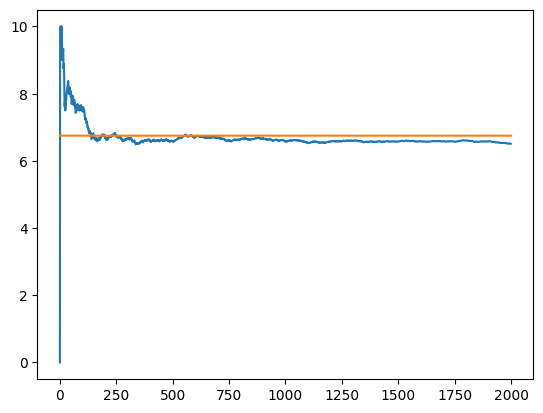

In [236]:
plt.plot(Z)
plt.plot(6.75*np.ones(Z.shape))
# Plots the Z array against an array of the same shape as the Z array but every value in the 2nd array is 6.75

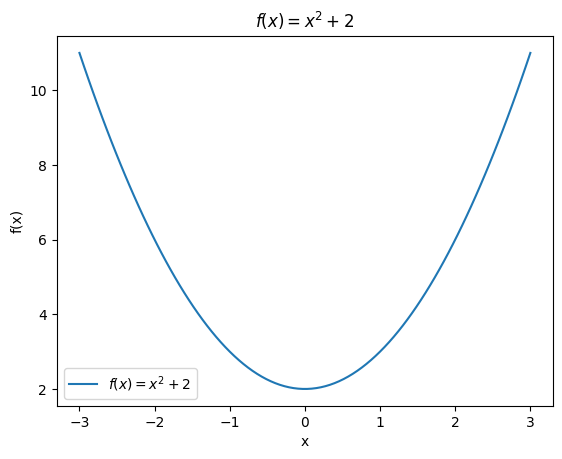

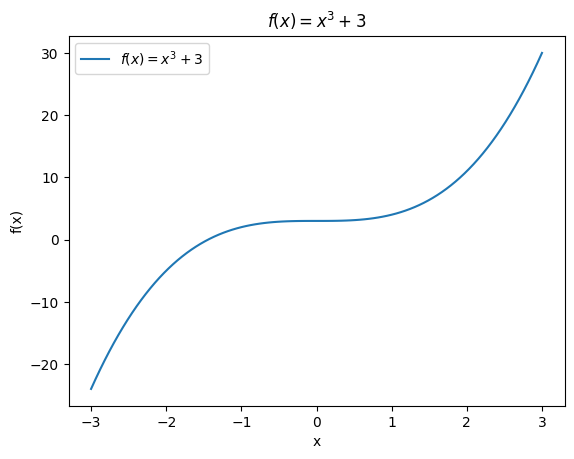

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.3442
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.74516


In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate
# Imports the necessary functions so it can be run seperately from the earlier code

# Define a general function for Monte Carlo integration
def monte_carlo_integrate2(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf()
    estimated_area = monte_carlo_integrate2(func, a, b, N, M)
    return exact_area, estimated_area

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100)
    y = func(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$")
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20)
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


# Visualization

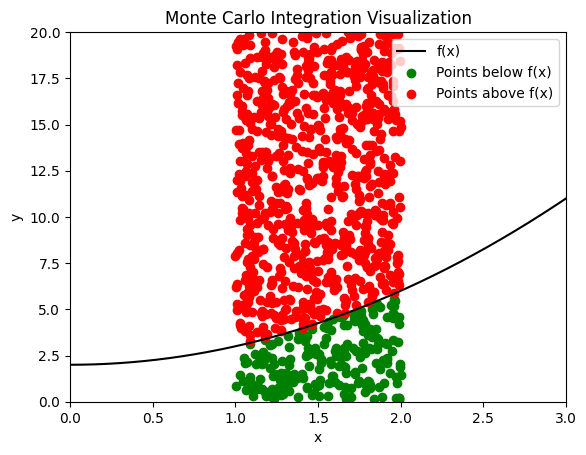

In [238]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N)
    y_points = M * np.random.random(N)
    below = y_points < func(x_points)
    above = np.invert(below)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1)
    plt.ylim(0, M)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend()

    plt.show()

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

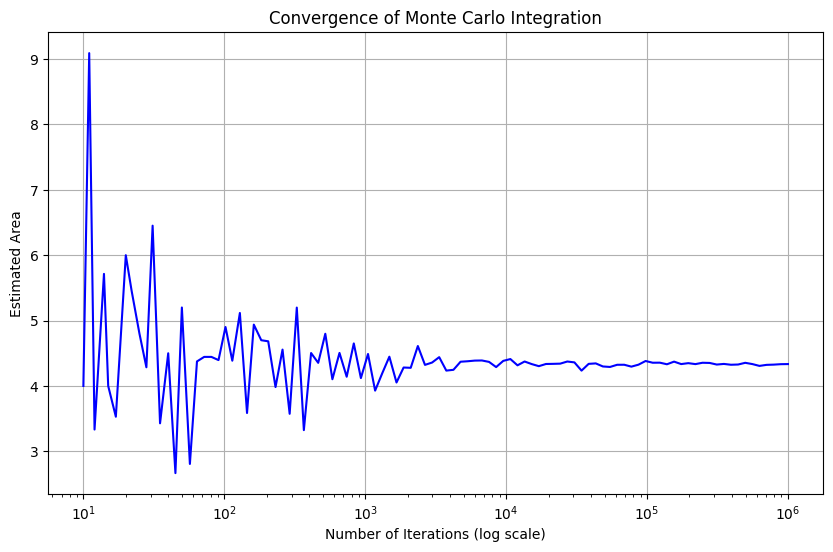

In [239]:
# Function for Monte Carlo Integration
def monte_carlo_integrate3(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = []

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate3(f, a, b, N, M)
    estimated_areas.append(estimated_area)

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()